In [1]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d}"
today

'2023-05-23'

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.utils.data as data_utils
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import torch.nn.functional as F
import math
#import gpytorch

import urllib.request
import os.path
from scipy.io import loadmat
from math import floor
import anndata
# Make plots inline
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['floor']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
torch.manual_seed(1)    # reproducible

In [4]:
import scCAMEL as scm
from scCAMEL import CamelPrefiltering
from scCAMEL import CamelSwapline
from scCAMEL import CamelEvo

/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelSwapline.py:637: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def addcolor(datax,clustername="Cluster", colorcode="color", predef=pd.Series()):


# Read data

In [5]:
cd .

/mnt/f/Dropbox/data/proj/PE_HYZ/IpythonRecord/Monkey_DRG


In [6]:
cd /mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets


In [7]:
screfall=anndata.read("SensoryNeurons_Zeisel-Sharma.h5ad")
screfall

AnnData object with n_obs × n_vars = 12635 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    uns: 'refcolor_dict'

In [8]:
#if the matrix is sparse matrix
#screfall.X=screfall.X.todense()

In [9]:
set(screfall.obs["Cluster"])

{'NF1',
 'NF2_3',
 'NF4',
 'NP1',
 'NP2',
 'NP3',
 'PEP1_PSPEP2',
 'PEP1_PSPEP3',
 'PEP1_PSPEP4',
 'PEP1_PSPEP5',
 'PEP2',
 'Sharma_Abeta-Field',
 'Sharma_Abeta-RA-LTMR',
 'Sharma_Adelta-LTMR',
 'Sharma_C-LTMR',
 'Sharma_CGRP-Alpha',
 'Sharma_CGRP-Beta',
 'Sharma_CGRP-Epsilion',
 'Sharma_CGRP-Eta',
 'Sharma_CGRP-Gamma',
 'Sharma_CGRP-Theta',
 'Sharma_CGRP-Zeta',
 'Sharma_Nonpeptidergic nociceptors',
 'Sharma_Proprioceptors',
 'Sharma_Sst',
 'Sharma_TrpM8',
 'TRPM8',
 'Th'}

In [10]:
scref=screfall[screfall.obs["batch"]=="0"]

In [11]:
set(scref.obs["Cluster"])

{'Sharma_Abeta-Field',
 'Sharma_Abeta-RA-LTMR',
 'Sharma_Adelta-LTMR',
 'Sharma_C-LTMR',
 'Sharma_CGRP-Alpha',
 'Sharma_CGRP-Beta',
 'Sharma_CGRP-Epsilion',
 'Sharma_CGRP-Eta',
 'Sharma_CGRP-Gamma',
 'Sharma_CGRP-Theta',
 'Sharma_CGRP-Zeta',
 'Sharma_Nonpeptidergic nociceptors',
 'Sharma_Proprioceptors',
 'Sharma_Sst',
 'Sharma_TrpM8'}

In [12]:
scref.obs.groupby(["Cluster"]).count()

mtrain_index  sample  species  batch  color
Cluster                                                                       
Sharma_Abeta-Field                          257     257      257    257    257
Sharma_Abeta-RA-LTMR                        273     273      273    273    273
Sharma_Adelta-LTMR                          182     182      182    182    182
Sharma_C-LTMR                              1554    1554     1554   1554   1554
Sharma_CGRP-Alpha                          1440    1440     1440   1440   1440
Sharma_CGRP-Beta                            135     135      135    135    135
Sharma_CGRP-Epsilion                        850     850      850    850    850
Sharma_CGRP-Eta                             270     270      270    270    270
Sharma_CGRP-Gamma                           705     705      705    705    705
Sharma_CGRP-Theta                           758     758      758    758    758
Sharma_CGRP-Zeta                            333     333      333    333    333
Sharma_Nonpeptidergic nociceptors          2817    2817     2817   2817   2817
Sharma_Proprioceptors                       234     234      234    234    234
Sharma_Sst                                  761     761      761    761    761
Sharma_TrpM8                                488     488      488    488    488

# Prefiltering_and_SelectFeatures

In [13]:
path='/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
#dfpfc2= prefilteringTest.prefilter(df_f=dfpfc,filename=filename, path=path)
scref= scm.CamelPrefiltering.prefilter(datax=scref,filename=filename, path=path)

CamelRunning_Prefilter......


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:70: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  datax.var["Filter1"]=ftlist


CamelRunning_Prefilter......Finished


In [14]:
scref=scm.CamelPrefiltering.DataScaling(scref)

In [15]:
dfdev2=pd.DataFrame(scref.X,index=scref.obs.index,columns=scref.var.index).T
dfdev2=dfdev2.loc[scref.var['Filter1']==True]
dfdev2.shape

(12240, 11057)

In [16]:
markerlist=scm.CamelSwapline.enrichmentscoreBETA(dfpfcclus=scref.obs["Cluster"], df_dev=dfdev2, fc=3, pvalcutoff=0.1, shortcut=True)

Camel...Running: clusteringValue1...
Camel...Running: clusteringValue2...
2448
[Processing15
Camel...Running: CrossChecking...
-0%--6%--13%--20%--26%--33%--40%--46%--53%--60%--66%--73%--80%--86%--93%-Camel...Running: output genelist...


In [17]:
markerlist2=list(set(markerlist))
len(markerlist2)

2738

CamelRunning_MVgenes......


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CamelRunning_MVgenes......Finished


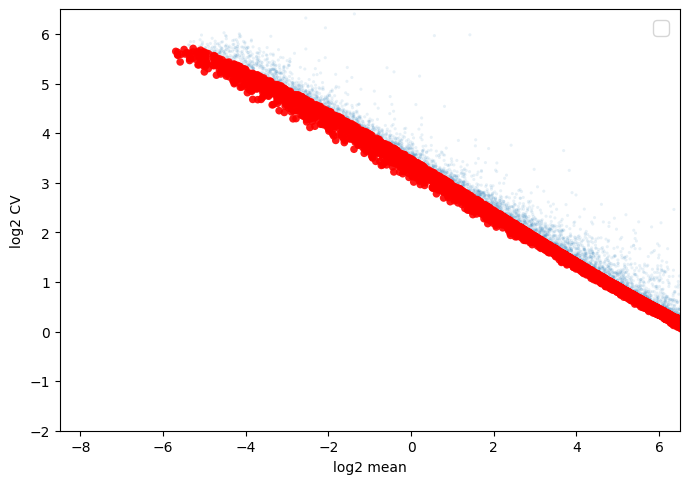

In [18]:
scref, score,  thrs, ax=scm.CamelPrefiltering.MVgenes(datax=scref,wt=3, markerlist=markerlist2,
                                                  plotfig=True, Xlow=-8.5, Xhigh=6.5, Ylow=-2, Yhigh=6.5,alphaValue=0.9, sValue=30,
           fig_args={'figsize': (8, 8), 'facecolor': 'white', 'edgecolor': 'white'})

In [19]:
len(scref.var.index[scref.var["MVgene"]])

5958

In [20]:
scref2=scref

In [21]:
########################################################
########################################################
#remeber to change the file path in tftable
########################################################
########################################################
scref =scm.CamelPrefiltering.MVgene_Scaling(datax=scref2,score=score,
                                                                   thrs=thrs, TPTT=100000,     mprotogruop=scref.obs["Cluster"].values,commongene=None,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")



CamelRunning---GenesScaling......


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:791: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:792: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:794: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:795: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_dev = scalepfc.loc[set(scalepfc.index) & set(sharedMVgenes

CamelRunning---TrainingGenesScaling......Finished


In [22]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names'
    obsm: 'train_set_values'

# Neural-Network learning

In [23]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=100,
    learningRate=0.0075,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cpu.......
CamelRunning---NNclasffier_in_cpu.......Finished


# Accuracy plot, the overall clustering accuracy is ~85%

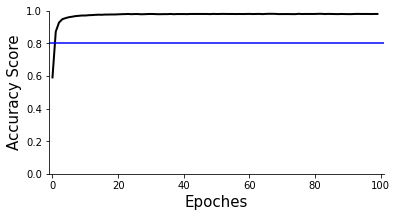

In [24]:
ax=scm.CamelPrefiltering.AccuracyPlot( nnModel=net, accCutoff=0.8,
                 Xlow=-1, Ylow=0.0, Yhigh=1,
               )

# Make predition and visualization in Radar plot

In [23]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=30,
    learningRate=0.0075,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cpu.......
CamelRunning---NNclasffier_in_cpu.......Finished


In [24]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names'
    obsm: 'train_set_values'

In [25]:
#if color is not defined: scref.obs[ 'color']
#scref=scm.CamelSwapline.addcolor(datax=scref,clustername="Cluster", colorcode="color")

In [26]:
scref.uns["mwanted_order"] =list(sort(list(set(scref.obs["Cluster"]))))

In [27]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets


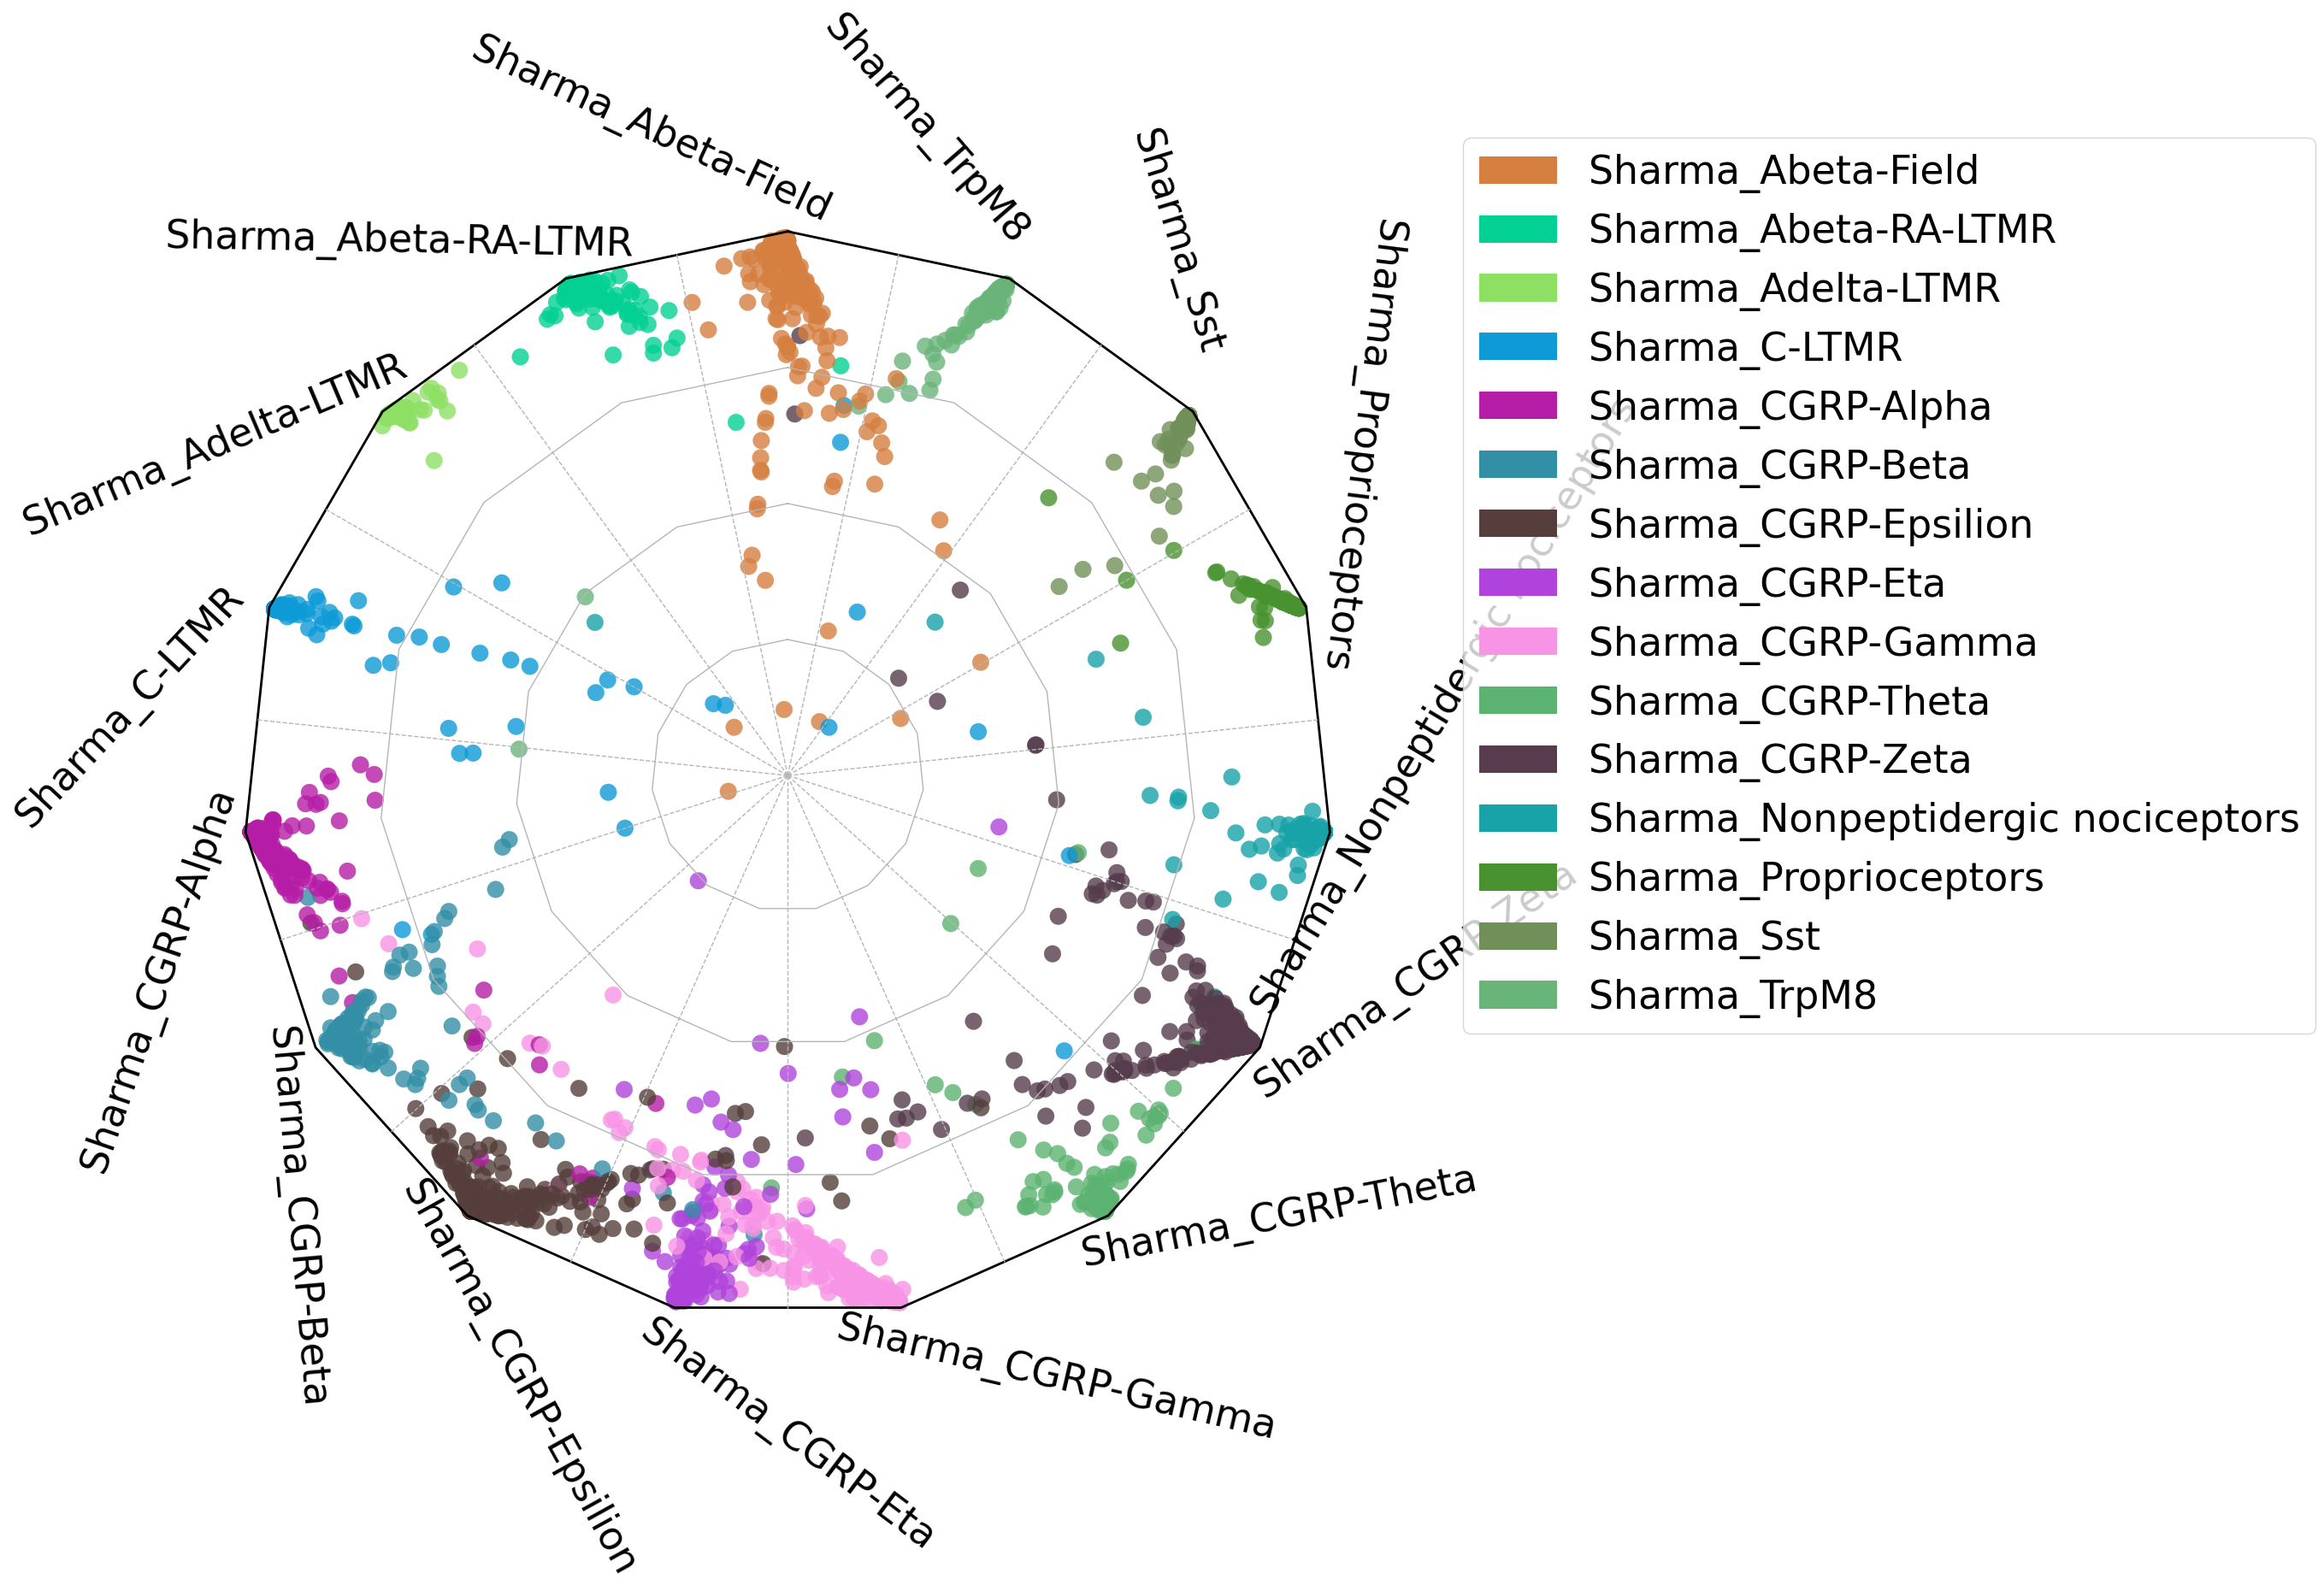

In [28]:
#radar  plot 
scref=scm.CamelSwapline.prediction(datax=scref, mcolor_dict=scref.uns["refcolor_dict"] ,net=net,learninggroup="train", radarplot=True,fontsizeValue=18,
                       ncolnm=3, bbValue=(1.2, 1.05)  )
#plt.savefig("upload_%s_RadarPlot_MacaqueRef_Merged_cluster.pdf"%today,bbox_inches='tight')

In [29]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

dfpfcclus = scref.obs[["mtrain_index","Cluster"]].T
dfpfcclus

In [30]:
#######################
#######################
#Multiplot_Violin
# each column along X axis represents a cell type, and the y-axis represents the cell-type probability
# each column along X axis contain all cells in the training, shown as dots with different colors
# in the perfect condition， only the cells of the same cell-type column will reach to the maxium (100%) probability, all other cells will be 0 probability
#however, in each cell-type column, some cells from other cell types may exhibit high probability, two reasons: 1. they may shared some features with this---
# cell-type, and these features drag them to the current cell-type; 2. they are inproperly classified due to many factors, such as low quality data, different clustering algorithm..... 
#######################
#######################

<Figure size 2500x1000 with 0 Axes>

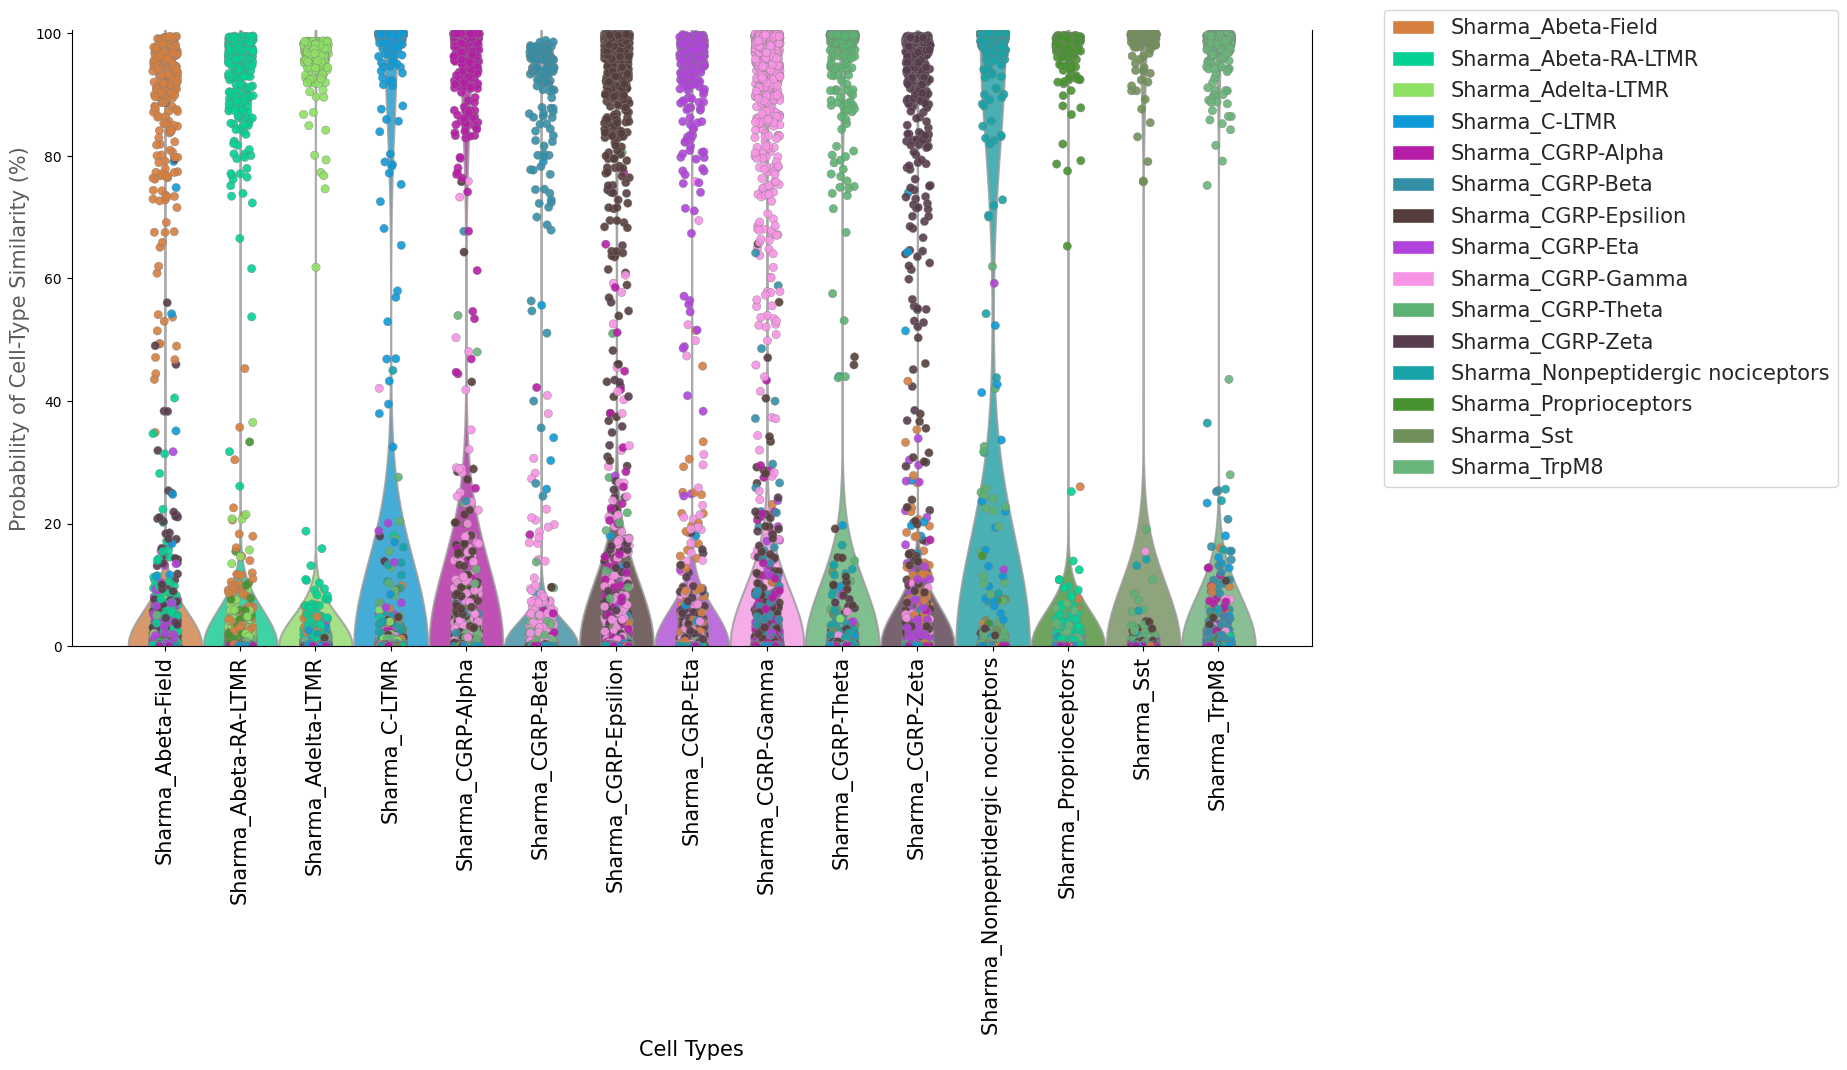

In [31]:
fig=scm.CamelSwapline.ProbMultiPlot( datax=scref, mcolor_dict=scref.uns["refcolor_dict"] )

# permutation control

In [32]:
## the whole data matrix is randomized, the red X represents 95% conficence of each cell-type

<Figure size 640x480 with 0 Axes>

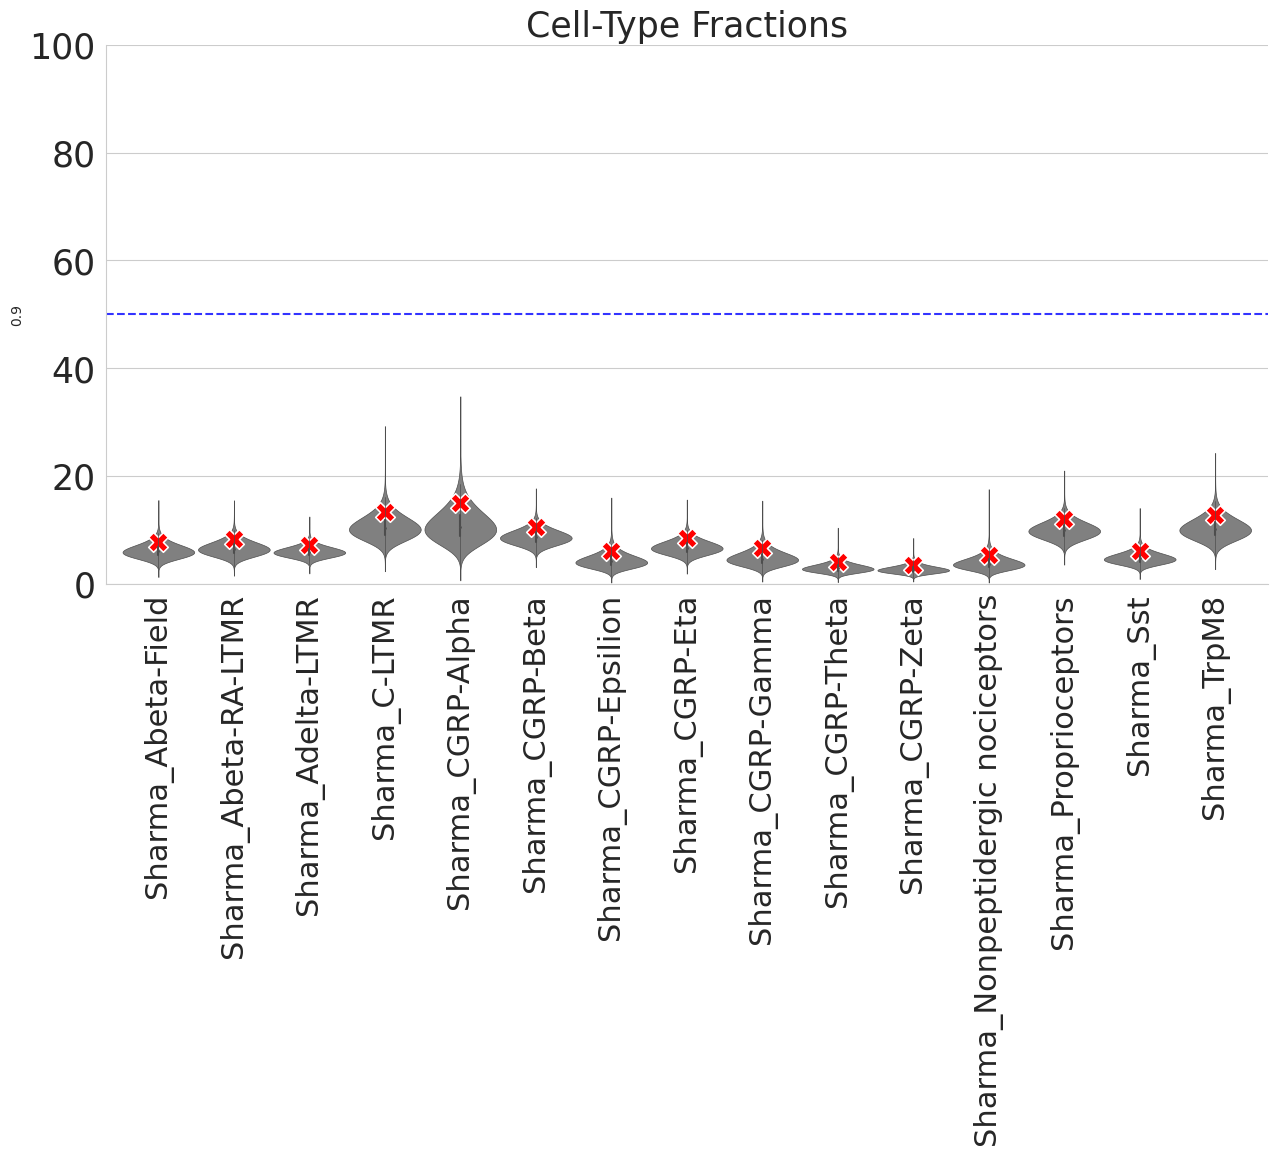

In [33]:
dftest0, ratiodf=scm.CamelSwapline.permutationTest(datax=scref,net=net,num=50, plotshow=True)

# Cluster consistency and accuracy

In [34]:
######
# The script uses the original, defined cell type as a reference to compare with the predicted cell type of each cell.
# If the predicted cell type matches the original defined cell type, the cell is deemed to be 'consistently assigned'.
# Conversely, if the predicted cell type does not match, the cell is considered 'inconsistently assigned', indicating possible incorrect clustering.
# Output File: This contains the ID of inconsistent cells, the originally defined cell type, and the predicted cell type.
# Output Plot: This displays the ratio (%) of cells that are correctly (consistently) and incorrectly (inconsistently) assigned cell types.

######

In [35]:
len(set(scref.obs.index))

11057

In [36]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [37]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelSwapline.py:466: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfprob1=dfprob1posi.append(dfprob1neg)


<Figure size 2500x1000 with 0 Axes>

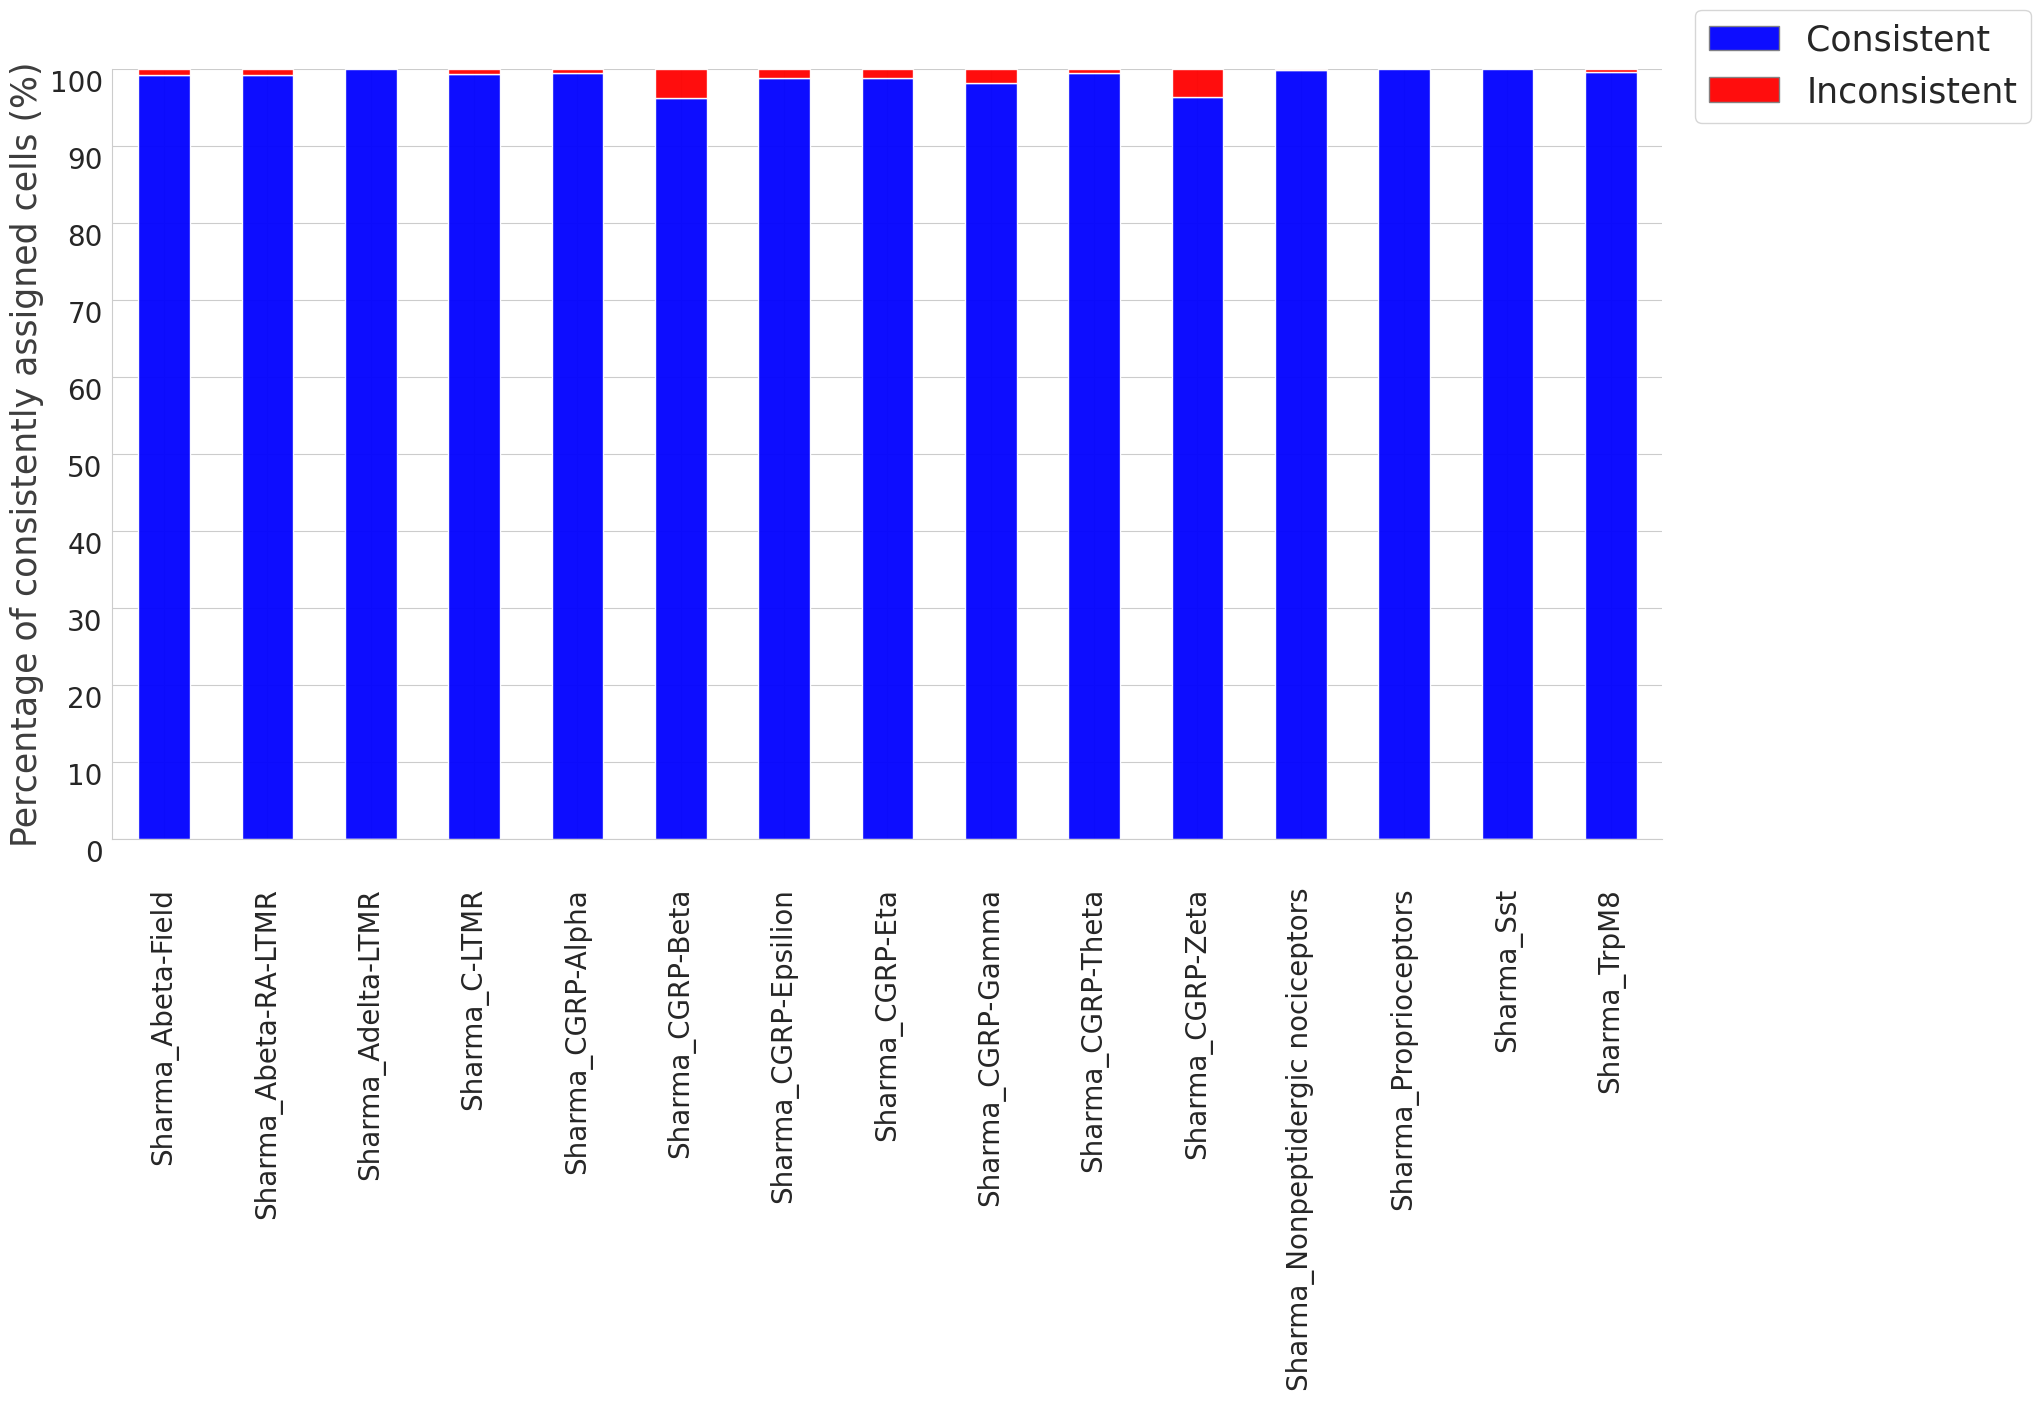

In [38]:
scref=scm.CamelSwapline.ConsistantAssign(datax=scref,dfsig=dftest0,outputfilepath="upload_%s_Sharma_Ref_InconsistantCells.csv"%today,
                                         outputPlot=True )

# Cell_Type Purity

In [39]:
#The ratio of the purity entropy for each cluster based on their learning scores, is used as a measure of purity.
#The function returns a pandas dataframe sorted by the purity score

<Figure size 640x480 with 0 Axes>

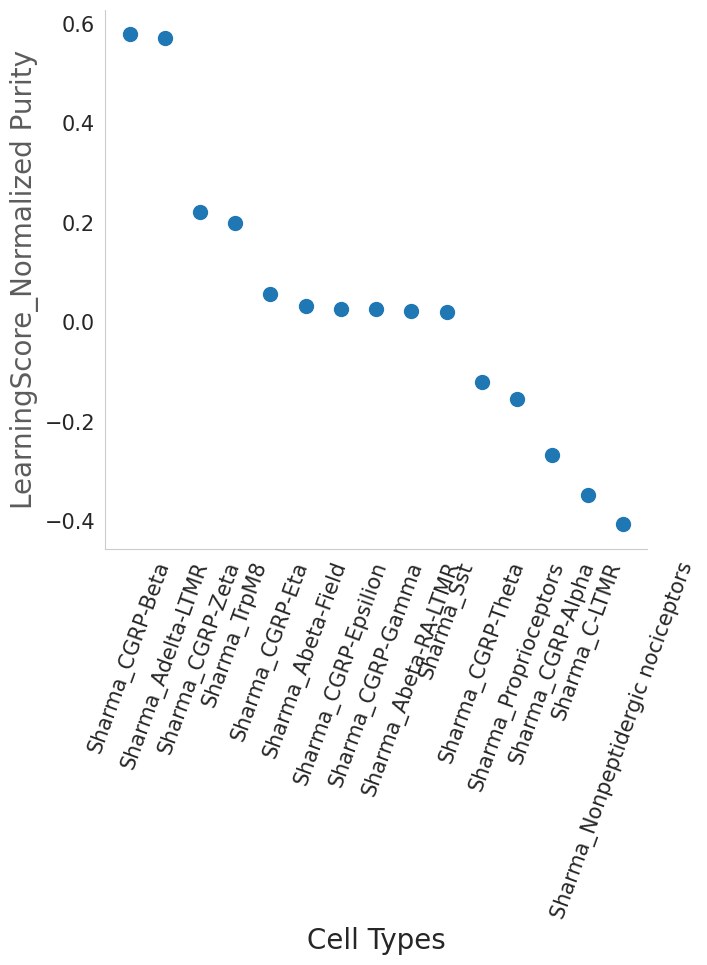

In [40]:
dfpurity1=scm.CamelSwapline.PurityEstimationLearningScore(datax=scref, clusterlist="Cluster",   elbow=False, figureplot=True)

# association between cell-types

In [41]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [42]:
# the heatmap of hierarchical clustering represents the cell-type similarity or association
#color from dark purple to light yellow represents the association from low to high
#number inside of eahc square indicating the association value.

<Figure size 1500x1500 with 0 Axes>

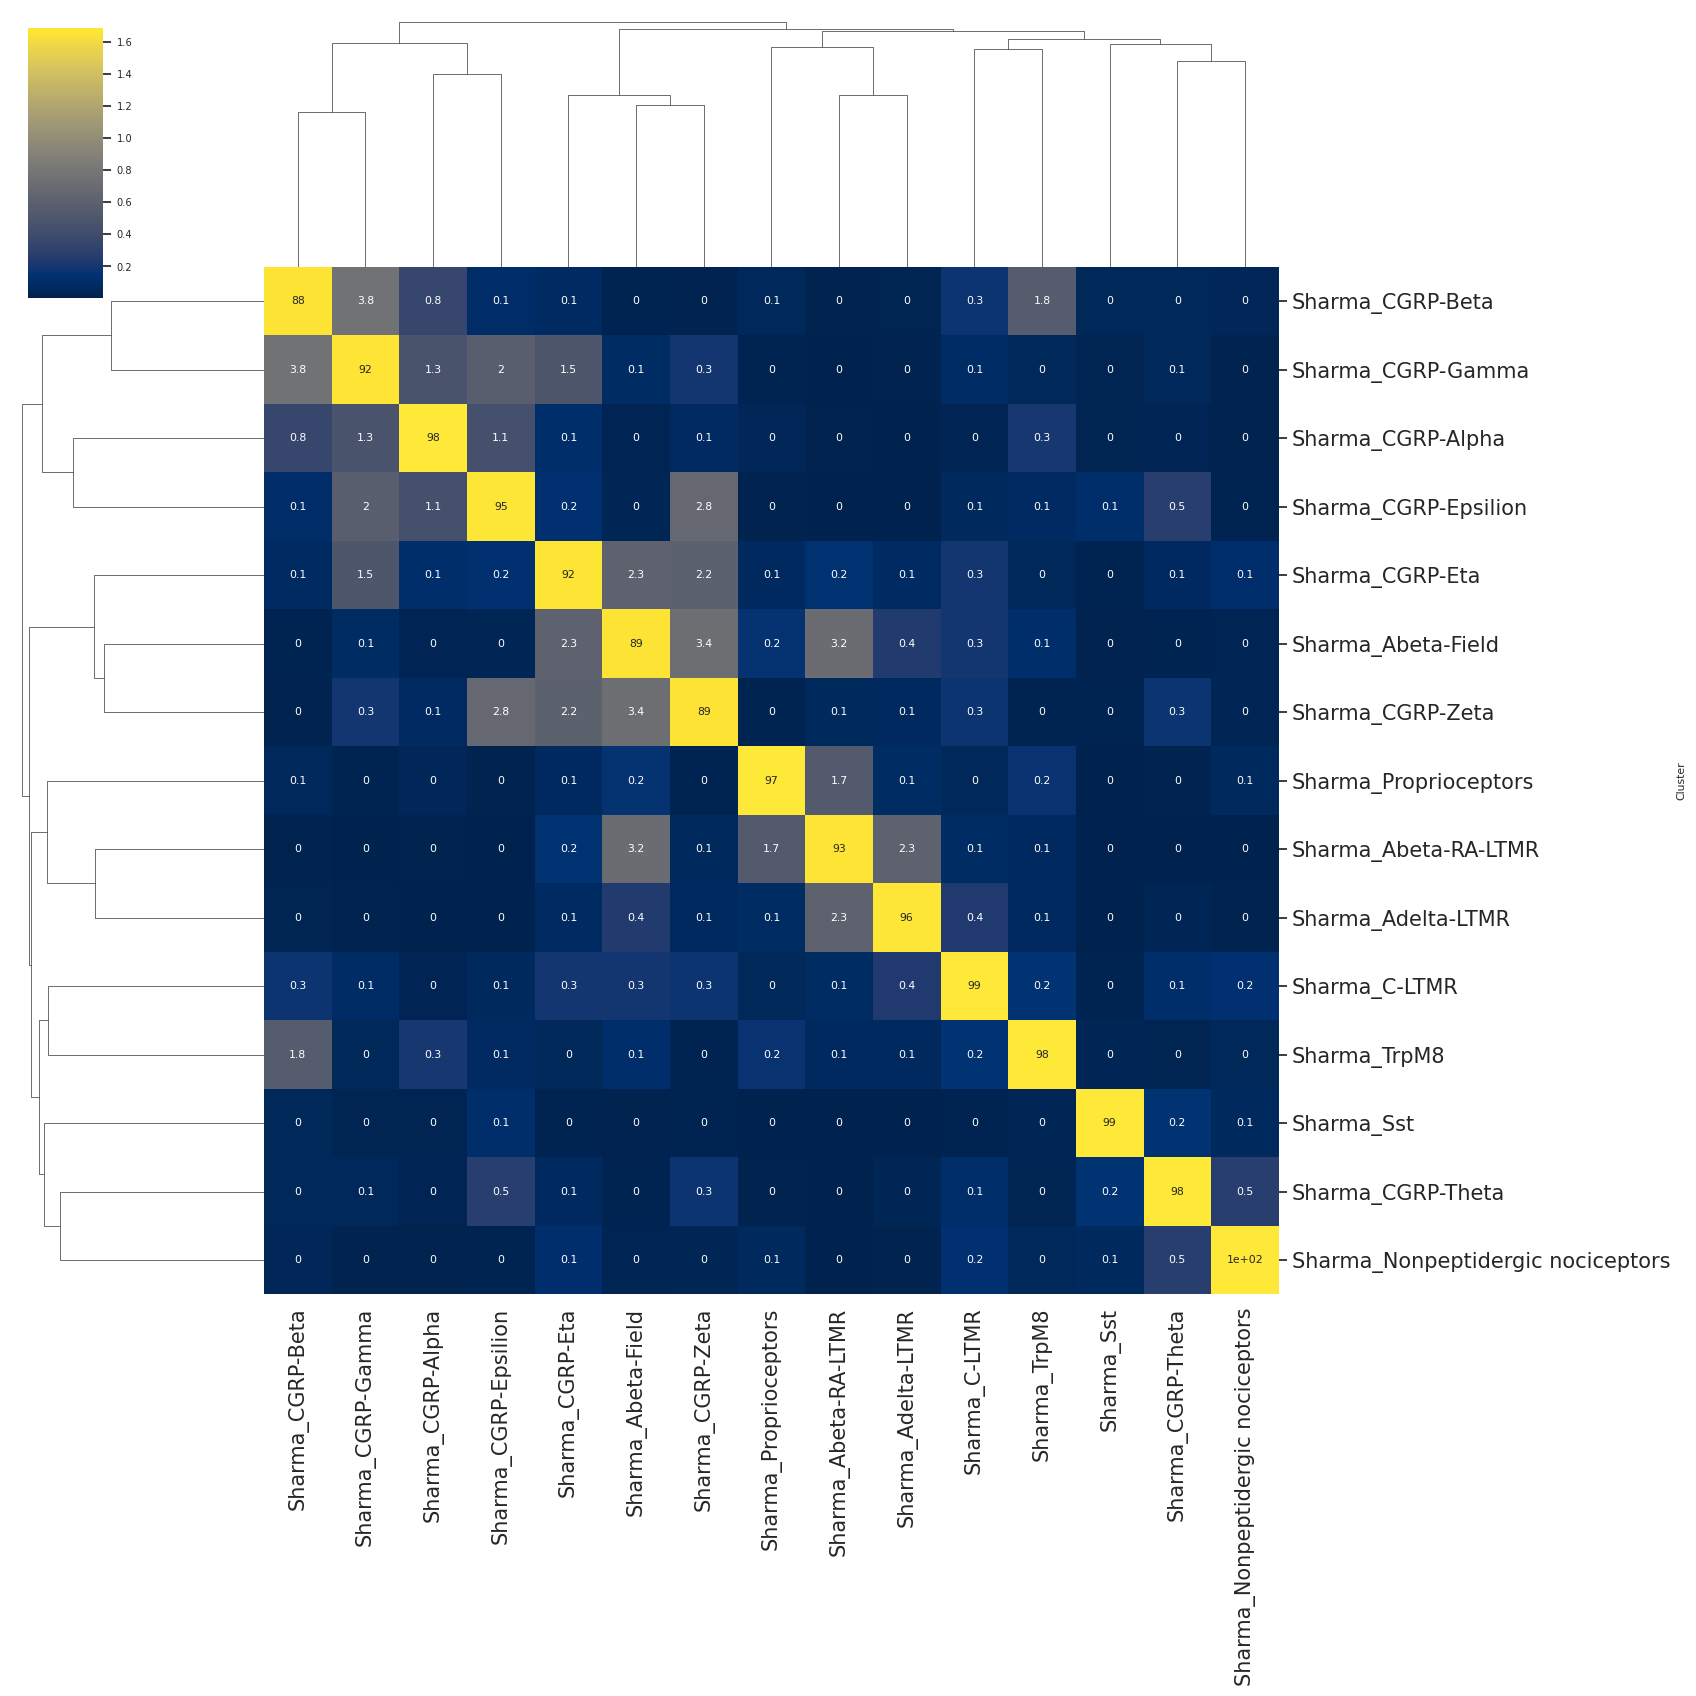

In [43]:
scm.CamelSwapline.CellTypeSimilarity(datax=scref, labelnum=True,  metricvalue='correlation',methodvalue="complete")

<Figure size 1500x1500 with 0 Axes>

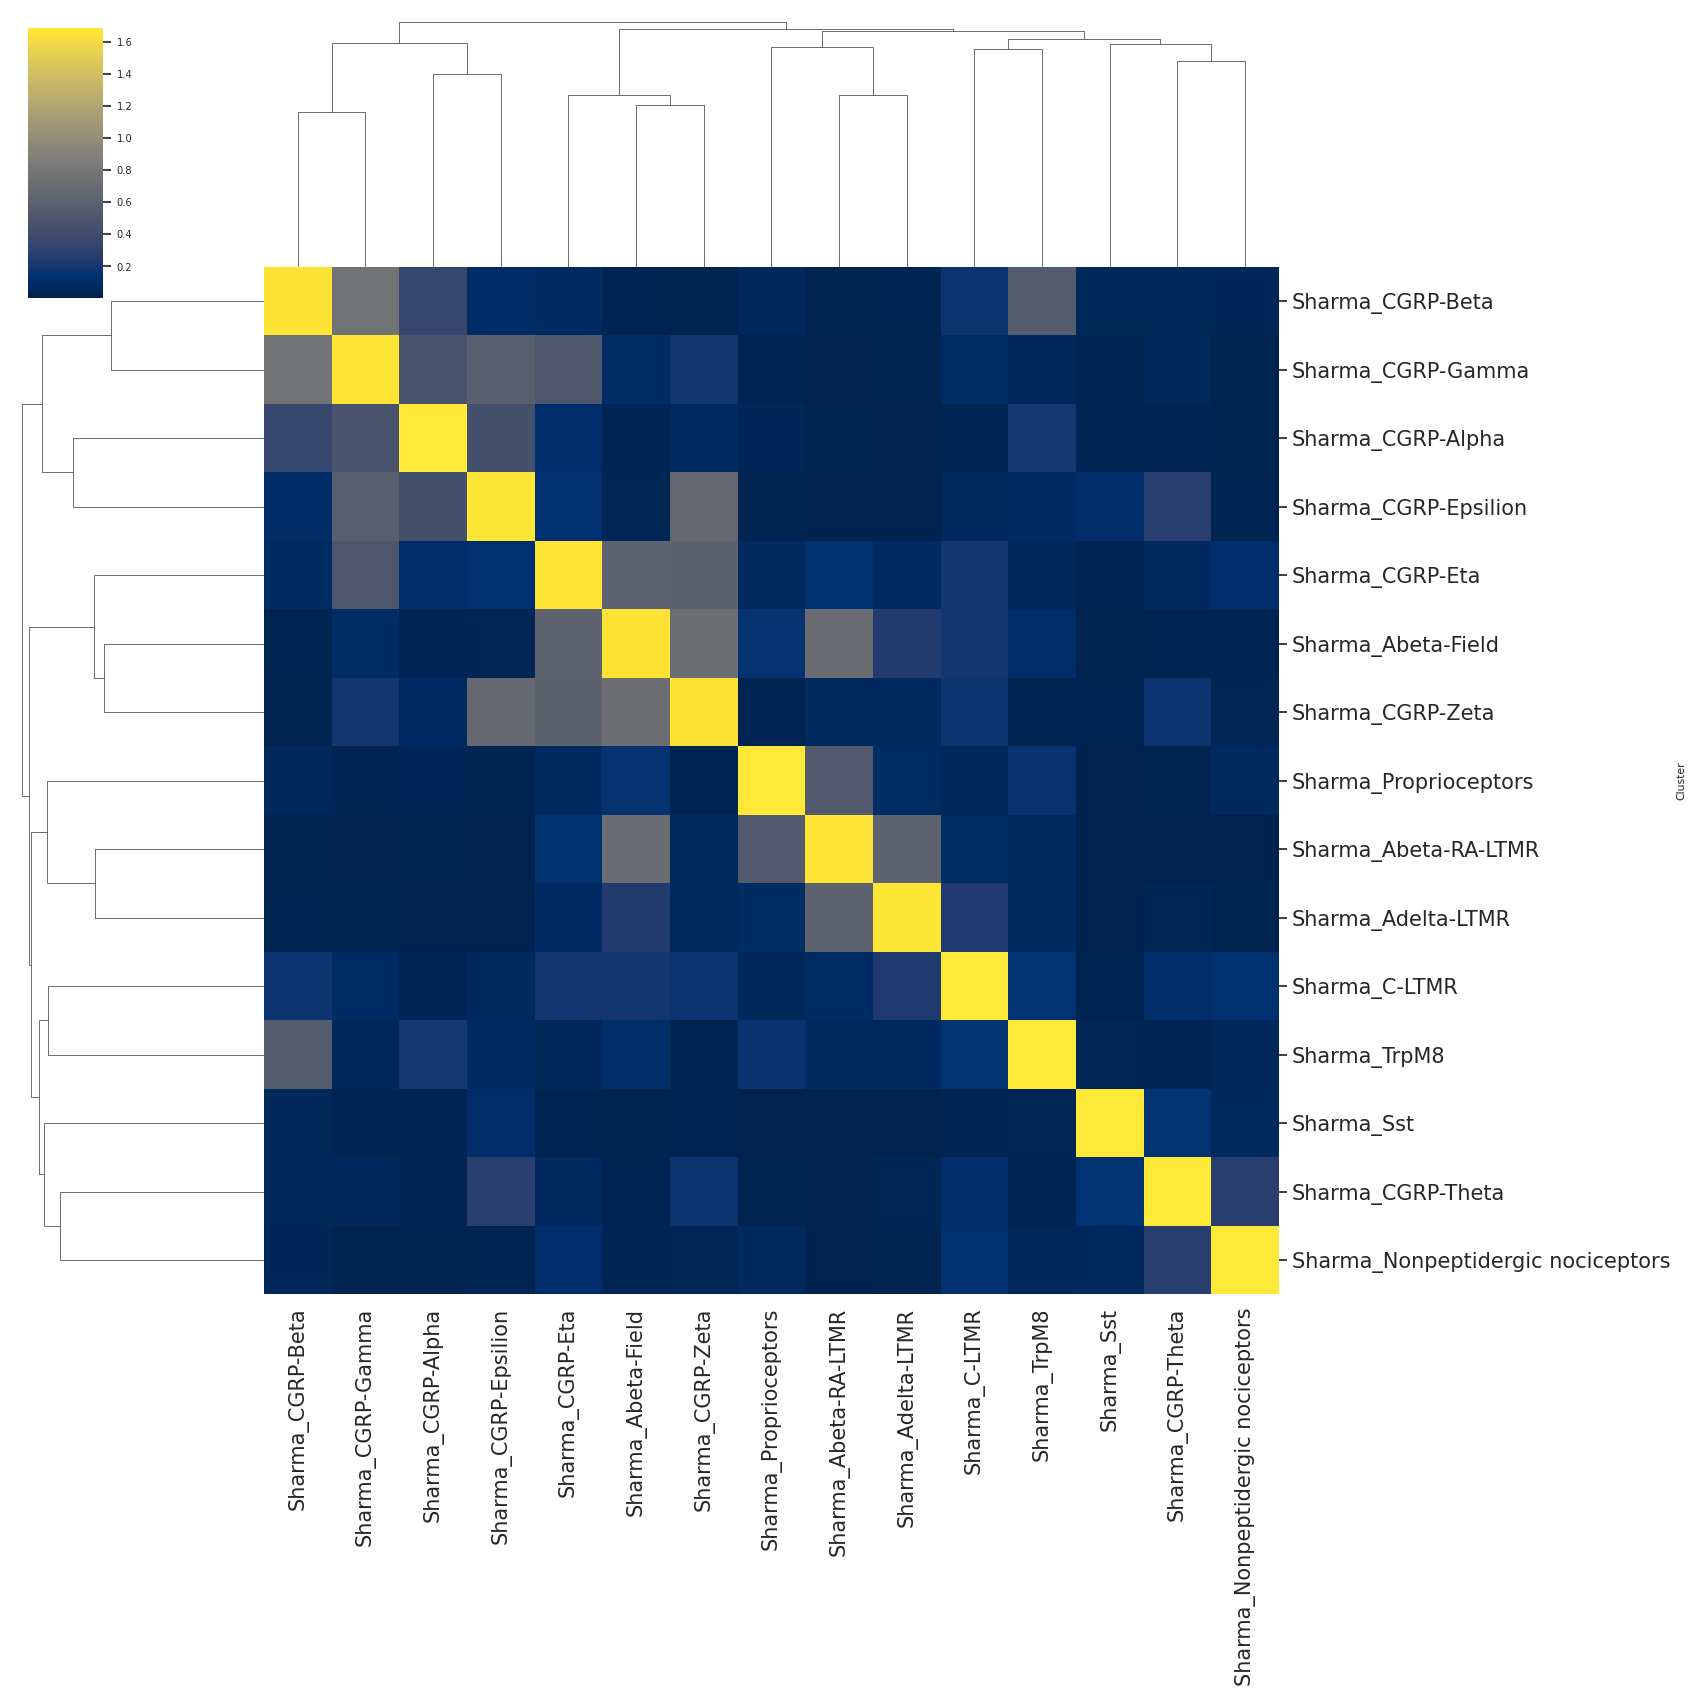

In [44]:
scm.CamelSwapline.CellTypeSimilarity(datax=scref, labelnum=False,  metricvalue='correlation',methodvalue="complete")

# Save data

In [45]:
scref

AnnData object with n_obs × n_vars = 11057 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [46]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets


In [47]:
work_dir="/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets"
QueryName="SharmaMouse"
TrainingName="SharmaMouse"
filename="%s_%s_Ref%s_MergeCluster.h5ad"%(QueryName,TrainingName,today)

In [48]:
os.path.join(work_dir,filename)

'/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets/SharmaMouse_SharmaMouse_Ref2023-05-23_MergeCluster.h5ad'

In [49]:
CamelSwapline.writedata(adatax=scref,filename=filename,filepath=work_dir)

In [50]:
scref.X=scref.X.todense()

# Prediction

# ZeiselMouse_cluster

In [51]:
scpdt=screfall[screfall.obs["batch"]=="1"]

In [52]:
set(scpdt.obs["Cluster"])

{'NF1',
 'NF2_3',
 'NF4',
 'NP1',
 'NP2',
 'NP3',
 'PEP1_PSPEP2',
 'PEP1_PSPEP3',
 'PEP1_PSPEP4',
 'PEP1_PSPEP5',
 'PEP2',
 'TRPM8',
 'Th'}

In [53]:
scpdt

View of AnnData object with n_obs × n_vars = 1578 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    uns: 'refcolor_dict'

In [54]:
scpdt.var.index

Index(['HTR1F', 'GPAT2', 'CMTM7', 'SST', 'NTS', 'IL31RA', 'NPPB', 'ADA',
       'CFAP61', 'CBLN1',
       ...
       'KRTAP7-1', 'NKX1-1', 'NKX1-2', 'NKX2-2', 'NKX3-1', 'NKX3-2', 'NKX6-1',
       'NKX6-2', 'NKX6-3', 'RPL9'],
      dtype='object', length=15677)

In [55]:
scpdt2=scpdt.copy()
scpdt2.X=scpdt.X*(scref.X.std()/scpdt2.X.std())

In [56]:
########################################################
########################################################
#remeber to change the file path in tftable
########################################################
########################################################
scpdt =scm.CamelPrefiltering.MVgene_Scaling(datax=scpdt2,TPTT=1000000,   commongene=scref.var.index.tolist(),  
                                        sharedMVgenes=scref.uns[ 'train_set_gene'].tolist(),
                                                                                            std_scaling=True,score=None, thrs=None,  mprotogruop=None,
    tftable="f:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="test")



CamelRunning---GenesScaling......


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:820: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


CamelRunning---TestGenesScaling......Finished


In [57]:
scpdt

AnnData object with n_obs × n_vars = 1578 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names'
    obsm: 'test_set_values'

In [58]:
#del scpdt.obs["color"]

In [59]:
# if color is not definedi
#scpdt=scm.CamelSwapline.addcolor(datax=scpdt,clustername="Cluster", colorcode="color")

In [60]:
scpdt.uns["mwanted_order"] =list(sort(list(set(scpdt.obs["Cluster"]))))

In [61]:
scpdt

AnnData object with n_obs × n_vars = 1578 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order'
    obsm: 'test_set_values'

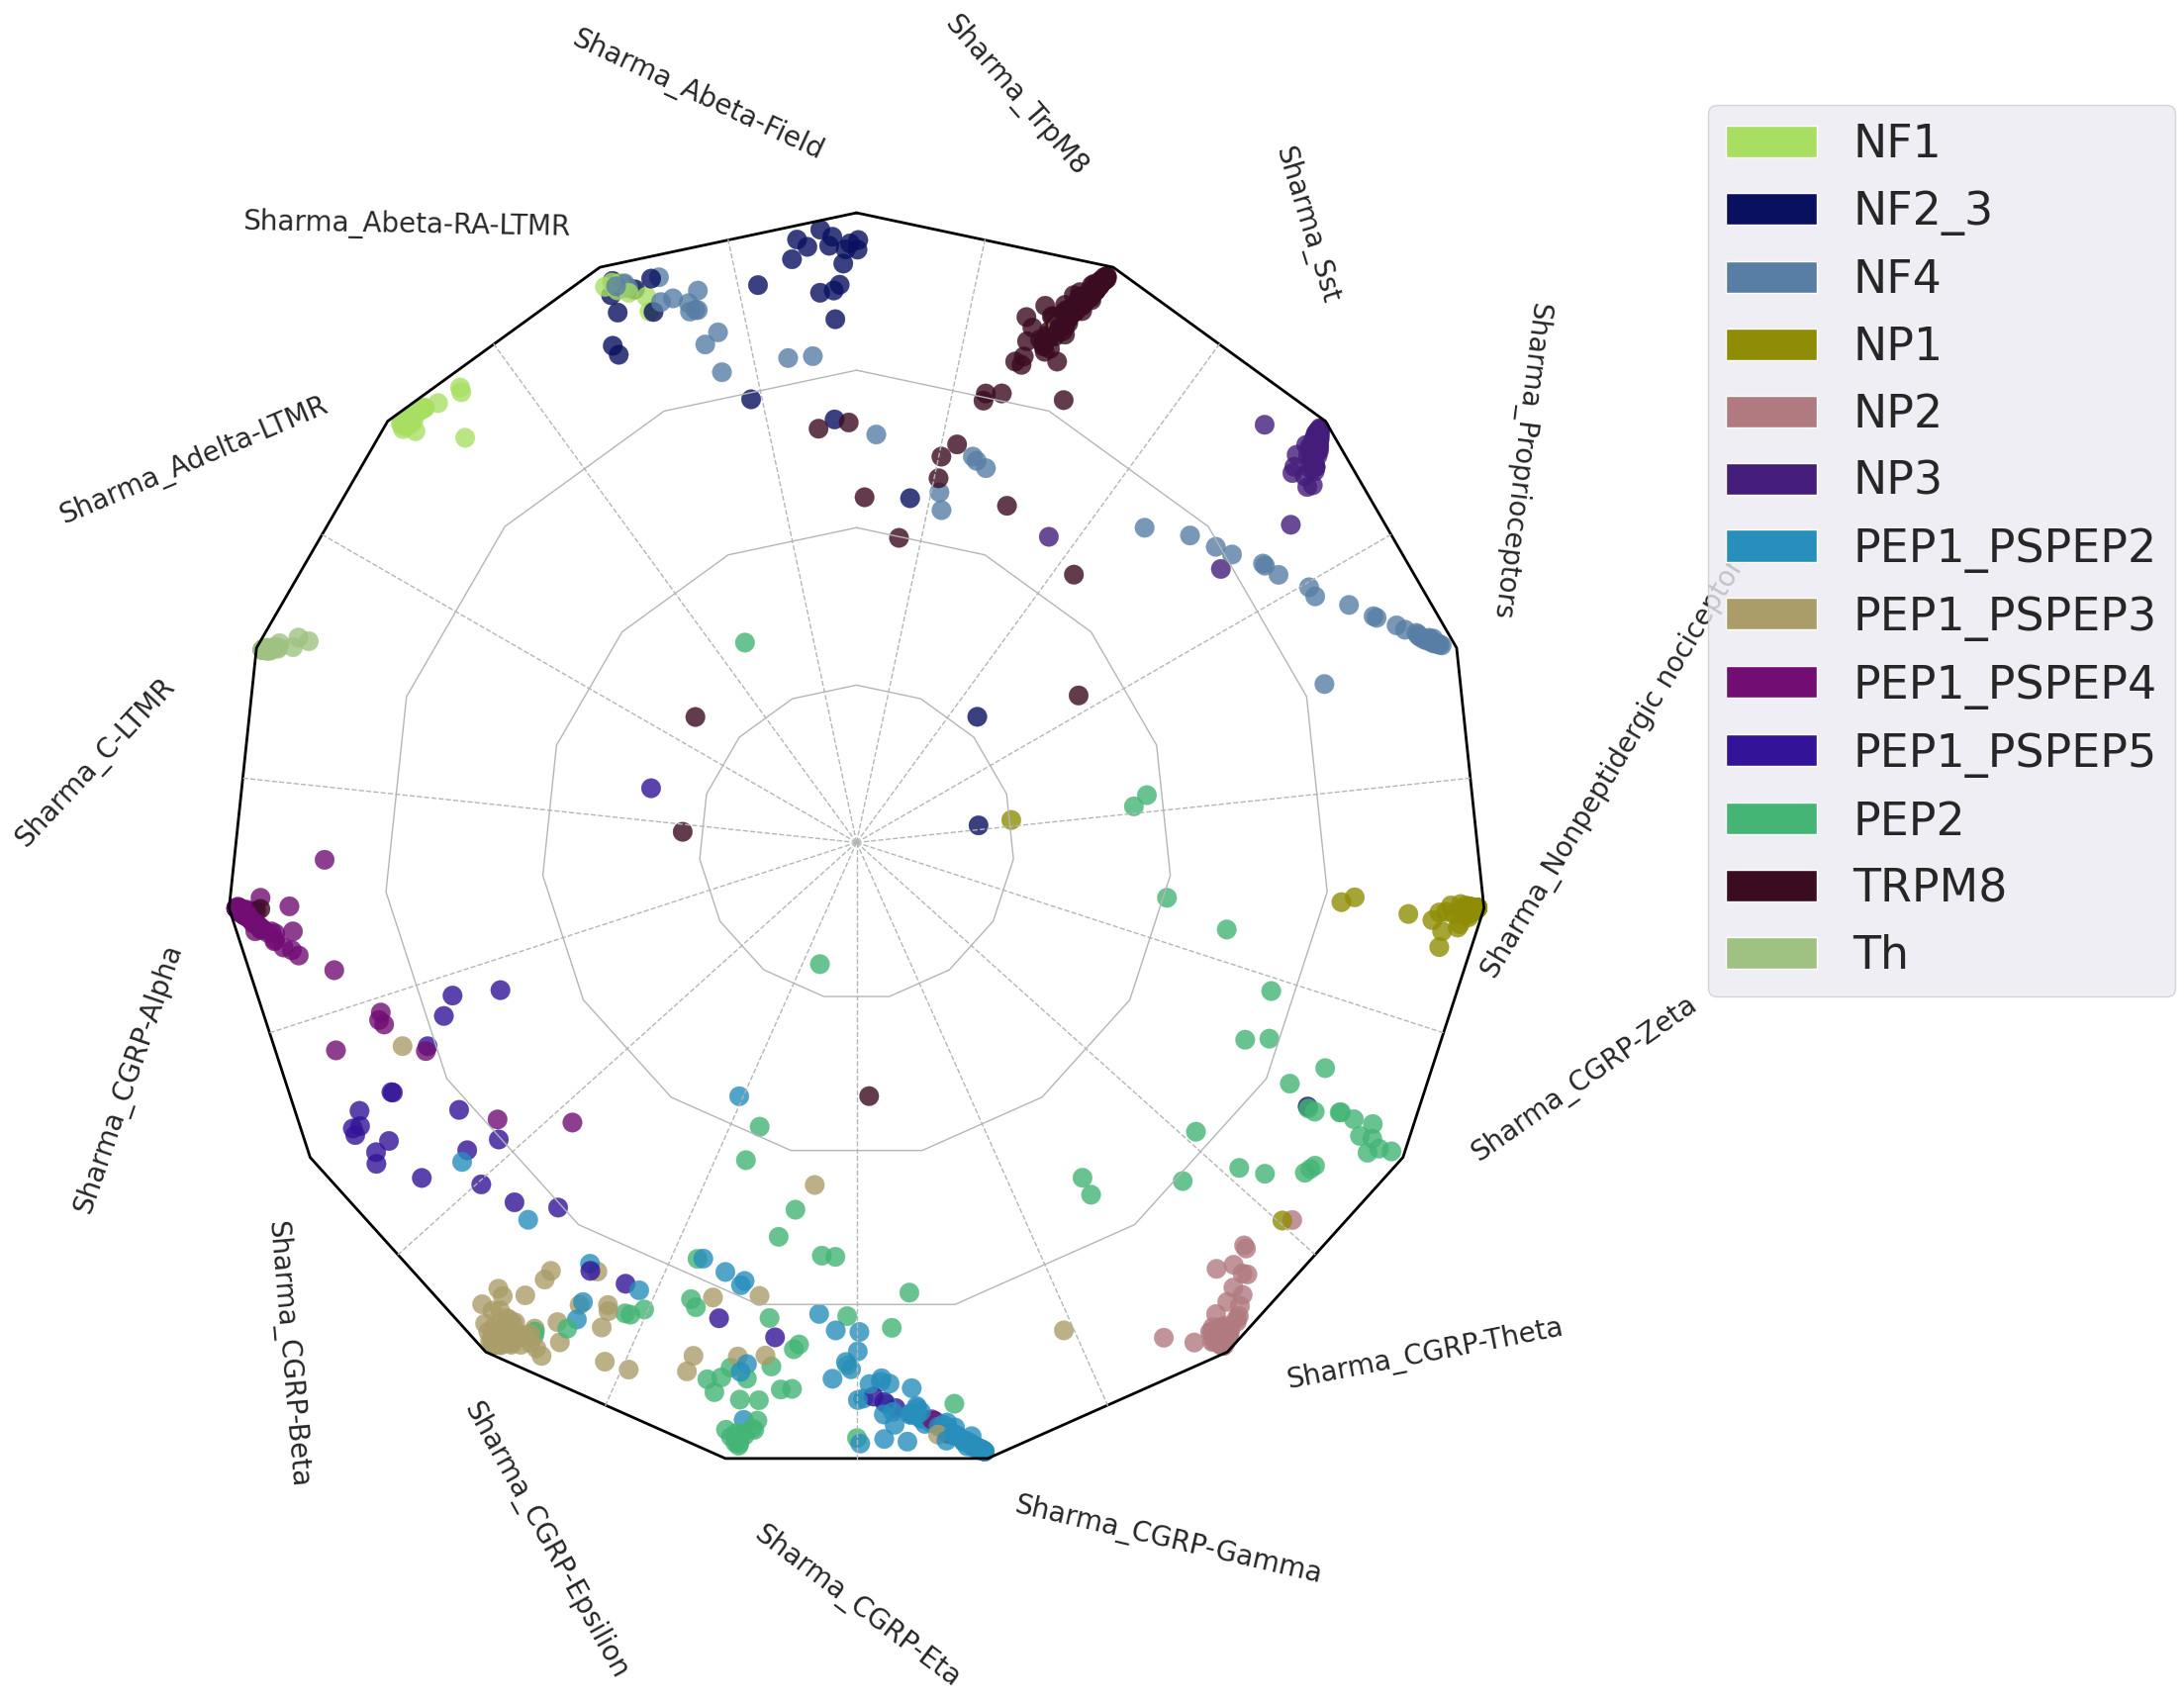

In [62]:
test=scm.CamelSwapline.prediction(datax=scpdt, mcolor_dict=scpdt.uns["refcolor_dict"],net=net,learninggroup="test", radarplot=True, fontsizeValue=35,
              datarefplot=scref,               ncolnm=1, bbValue=(1.1, 1.05))

In [63]:
scpdt

AnnData object with n_obs × n_vars = 1578 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'test_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [64]:
genename=sort(list(set(scpdt.obs["Cluster"])))
name=sort(list(set(scref.obs["Cluster"])))

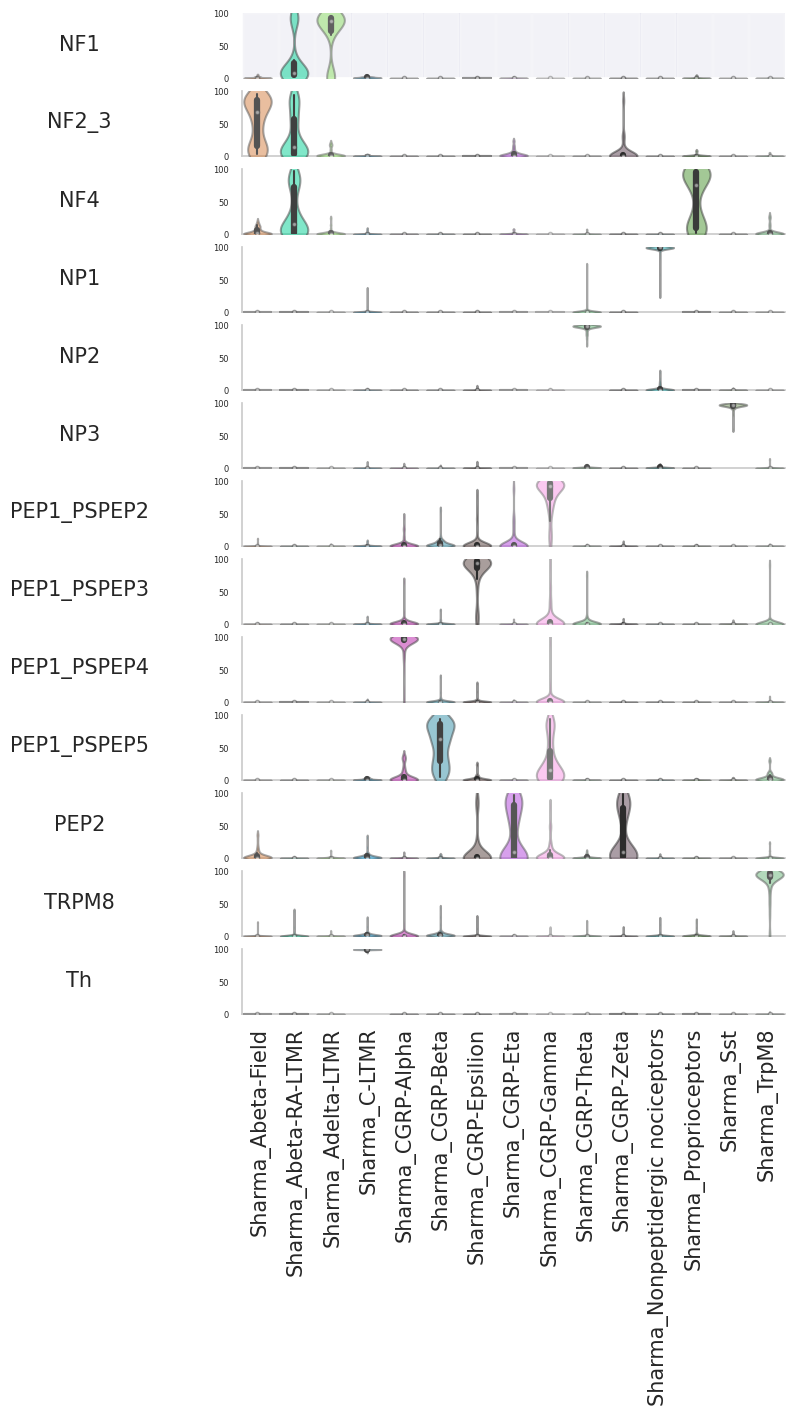

In [65]:
dfprob=pd.DataFrame(scpdt.obsm['Celltype_Score'])
dfprob.columns=scpdt.uns['Celltype_Score_RefCellType']
dfprob.index=scpdt.obs.index
dfmk=dfprob.astype(float).join(scpdt.obs["Cluster"],how="inner").T
dfprob=scm.CamelSwapline.CellTypeSimilarityViolinPlot(datax=scpdt, dataref=scref)

# Save data

In [66]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets


In [67]:
scpdt

AnnData object with n_obs × n_vars = 1578 × 15677
    obs: 'Cluster', 'mtrain_index', 'sample', 'species', 'batch', 'color'
    var: 'RefGeneList'
    uns: 'refcolor_dict', 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'test_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [68]:
work_dir="/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets"
QueryName="ZeiselMouse"
TrainingName="SharmaMouse"
filename="%s_%s_Ref%s_MergeCluster.h5ad"%(QueryName,TrainingName,today)

In [69]:
os.path.join(work_dir,filename)

'/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/Datasets/ZeiselMouse_SharmaMouse_Ref2023-05-23_MergeCluster.h5ad'

In [70]:
CamelSwapline.writedata(adatax=scref,filename=filename,filepath=work_dir)